# Graph Types Illustration using Python

This notebook illustrates several network/graph types using Python with NetworkX and Matplotlib. The notebook demonstrates:

1. **Directed vs. Undirected Networks**
2. **Weighted vs. Unweighted Networks**
3. **Triadic Closure**
4. **Sparse vs. Dense Networks**
5. **Agent-Based Modeling**: Simulating a 100-node directed network using a simple agent-based approach with configurable rules.

Each section below contains code that constructs a graph, visualizes it, and prints some summary information.

## 1. Directed vs. Undirected Networks

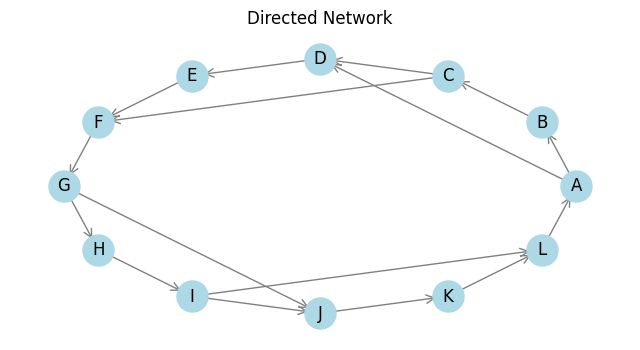

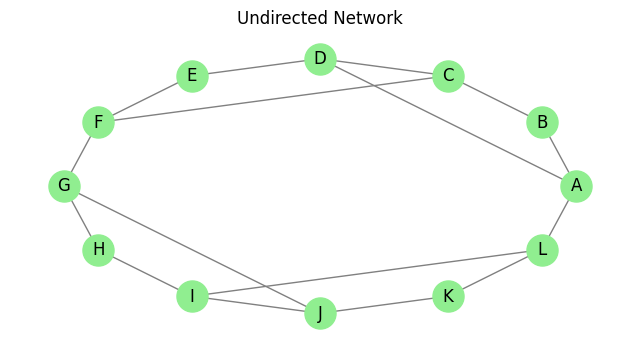

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_directed_network():
    G = nx.DiGraph()
    nodes = list('ABCDEFGHIJKL')
    G.add_nodes_from(nodes)
    
    # Create a circular structure plus some extra directed edges
    edges = [
        ('A','B'), ('B','C'), ('C','D'), ('D','E'), ('E','F'),
        ('F','G'), ('G','H'), ('H','I'), ('I','J'), ('J','K'),
        ('K','L'), ('L','A'), ('A','D'), ('C','F'), ('G','J'), ('I','L')
    ]
    G.add_edges_from(edges)
    plt.figure(figsize=(8,4))
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray')
    plt.title('Directed Network')
    plt.axis('off')
    plt.show()

def draw_undirected_network():
    G = nx.Graph()
    nodes = list('ABCDEFGHIJKL')
    G.add_nodes_from(nodes)
    
    # Create a similar structure without edge direction
    edges = [
        ('A','B'), ('B','C'), ('C','D'), ('D','E'), ('E','F'),
        ('F','G'), ('G','H'), ('H','I'), ('I','J'), ('J','K'),
        ('K','L'), ('L','A'), ('A','D'), ('C','F'), ('G','J'), ('I','L')
    ]
    G.add_edges_from(edges)
    plt.figure(figsize=(8,4))
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    plt.title('Undirected Network')
    plt.axis('off')
    plt.show()

# Draw directed and undirected networks
draw_directed_network()
draw_undirected_network()

## 2. Weighted vs. Unweighted Networks

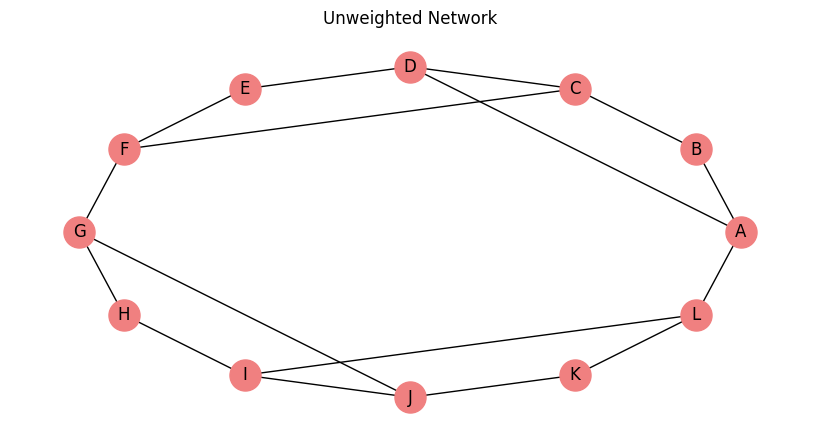

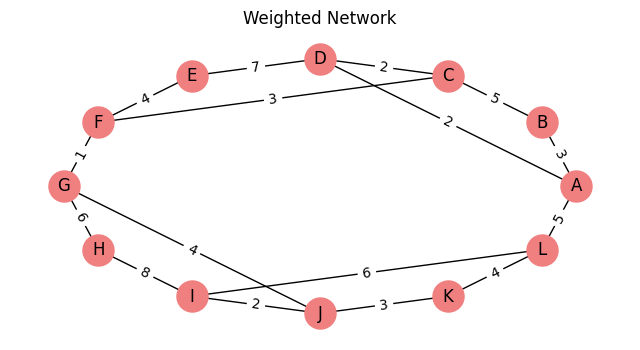

In [2]:
def draw_unweighted_network():
    G = nx.Graph()
    nodes = list('ABCDEFGHIJKL')
    G.add_nodes_from(nodes)
    edges = [
        ('A','B'), ('B','C'), ('C','D'), ('D','E'), ('E','F'),
        ('F','G'), ('G','H'), ('H','I'), ('I','J'), ('J','K'),
        ('K','L'), ('L','A'), ('A','D'), ('C','F'), ('G','J'), ('I','L')
    ]
    G.add_edges_from(edges)
    plt.figure(figsize=(8,4))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=500, edge_color='black')
    plt.title('Unweighted Network')
    plt.show()

def draw_weighted_network():
    G = nx.Graph()
    nodes = list('ABCDEFGHIJKL')
    G.add_nodes_from(nodes)
    # Each edge has a weight attribute
    weighted_edges = [
        ('A','B',3), ('B','C',5), ('C','D',2), ('D','E',7),
        ('E','F',4), ('F','G',1), ('G','H',6), ('H','I',8),
        ('I','J',2), ('J','K',3), ('K','L',4), ('L','A',5),
        ('A','D',2), ('C','F',3), ('G','J',4), ('I','L',6)
    ]
    for u, v, w in weighted_edges:
        G.add_edge(u, v, weight=w)
    plt.figure(figsize=(8,4))
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightcoral', node_size=500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='black')
    # Draw edge labels showing weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Weighted Network')
    plt.axis('off')
    plt.show()

# Draw weighted and unweighted networks
draw_unweighted_network()
draw_weighted_network()

## 3. Triadic Closure

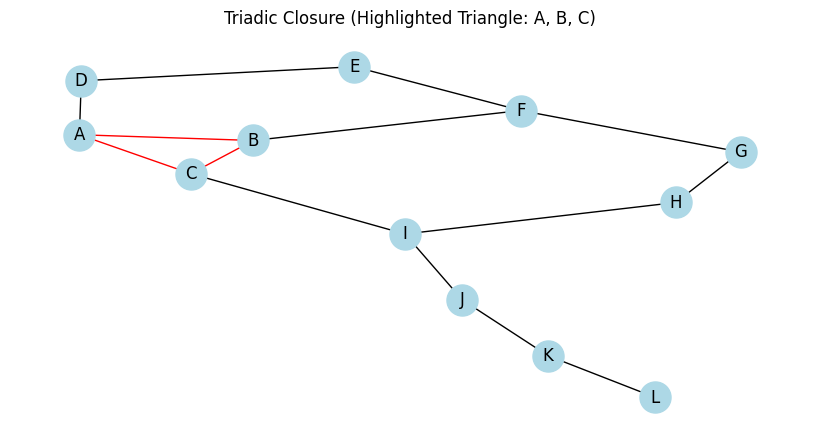

In [3]:
def draw_triadic_closure():
    # Create a graph with 12 nodes
    G = nx.Graph()
    nodes = list('ABCDEFGHIJKL')
    G.add_nodes_from(nodes)
    
    # Add edges to form a highlighted triangle among A, B, C
    triadic_edges = [
        ('A','B'), ('B','C'), ('A','C')
    ]
    G.add_edges_from(triadic_edges, color='red', weight=2)
    
    # Add additional edges to connect the rest of the network
    extra_edges = [
        ('D','E'), ('E','F'), ('F','G'), ('G','H'),
        ('H','I'), ('I','J'), ('J','K'), ('K','L'),
        ('A','D'), ('B','F'), ('C','I')
    ]
    G.add_edges_from(extra_edges)
    
    # Get edge colors: red for triadic edges, black for others
    edge_colors = [G[u][v].get('color', 'black') for u, v in G.edges()]
    
    plt.figure(figsize=(8,4))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color=edge_colors)
    plt.title('Triadic Closure (Highlighted Triangle: A, B, C)')
    plt.axis('off')
    plt.show()

# Draw triadic closure diagram
draw_triadic_closure()

## 4. Sparse vs. Dense Networks

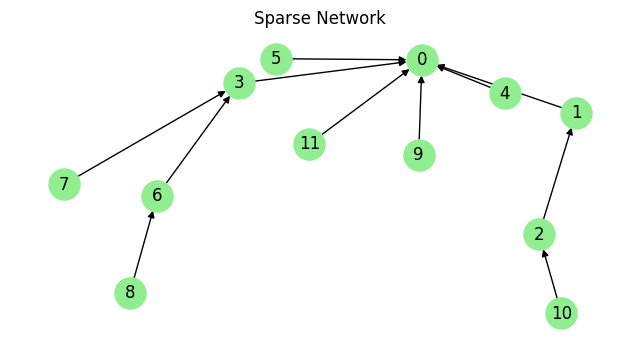

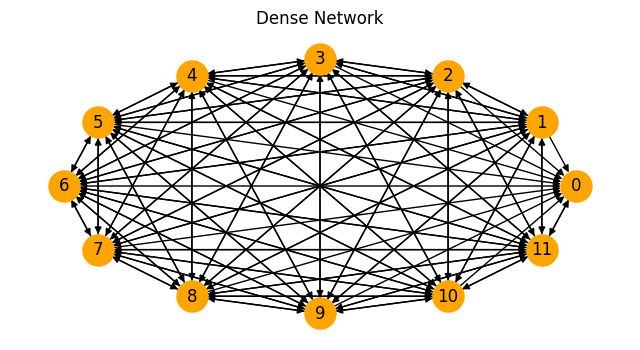

In [4]:
def draw_sparse_network():
    # Create a sparse directed graph with 12 nodes
    G = nx.gn_graph(12, seed=42)  # A growing network tends to be sparse
    plt.figure(figsize=(8,4))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx(G, pos, node_color='lightgreen', node_size=500, arrows=True)
    plt.title('Sparse Network')
    plt.axis('off')
    plt.show()

def draw_dense_network():
    # Create a dense directed graph with 12 nodes
    # We'll start with a complete digraph and then remove a few edges to avoid complete clutter
    G = nx.complete_graph(12, create_using=nx.DiGraph())
    # Remove some edges arbitrarily to still have a dense but not complete network
    edges_to_remove = list(G.edges())[:10]
    G.remove_edges_from(edges_to_remove)
    
    plt.figure(figsize=(8,4))
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos, node_color='orange', node_size=500, arrows=True)
    plt.title('Dense Network')
    plt.axis('off')
    plt.show()

# Draw sparse and dense networks
draw_sparse_network()
draw_dense_network()

## 5. Agent-Based Modeling: 100-Node Directed Network

This section simulates an agent-based model to generate a 100-node directed network using a simple random linking strategy over several time steps. The parameters are set directly in the code but could also be configured via JSON. In this simulation, at each time step each agent has a chance to create a directed link with another agent.


Time step 1: 12 edges added
Time step 2: 7 edges added
Time step 3: 5 edges added
Time step 4: 8 edges added
Time step 5: 9 edges added
Time step 6: 5 edges added
Time step 7: 5 edges added
Time step 8: 4 edges added
Time step 9: 6 edges added
Time step 10: 11 edges added
Time step 11: 2 edges added
Time step 12: 7 edges added
Time step 13: 6 edges added
Time step 14: 4 edges added
Time step 15: 3 edges added
Time step 16: 5 edges added
Time step 17: 8 edges added
Time step 18: 7 edges added
Time step 19: 3 edges added
Time step 20: 6 edges added
Time step 21: 4 edges added
Time step 22: 10 edges added
Time step 23: 2 edges added
Time step 24: 10 edges added
Time step 25: 3 edges added
Time step 26: 6 edges added
Time step 27: 7 edges added
Time step 28: 4 edges added
Time step 29: 8 edges added
Time step 30: 6 edges added
Time step 31: 6 edges added
Time step 32: 5 edges added
Time step 33: 9 edges added
Time step 34: 3 edges added
Time step 35: 3 edges added
Time step 36: 6 edges add

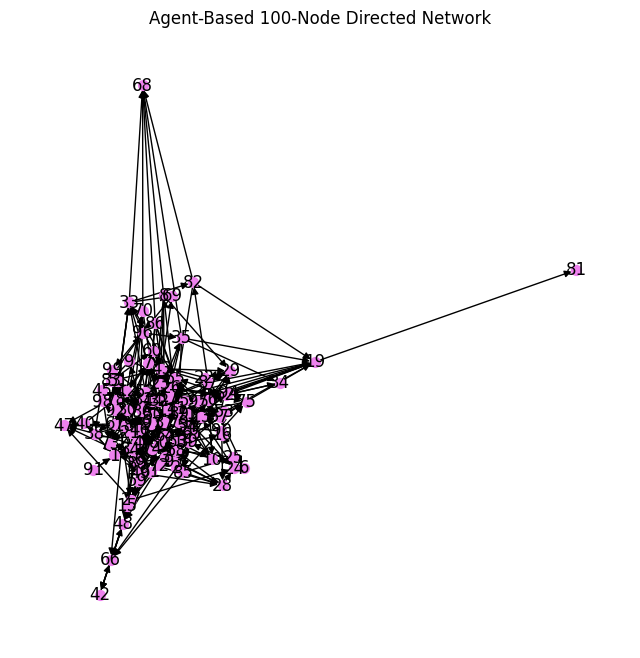

Agent-based network: 100 nodes, 335 edges


In [8]:
import json
import random
import networkx as nx
import matplotlib.pyplot as plt

def agent_based_simulation(num_agents, time_steps, p, edge_weights):
    """
    Runs an agent-based simulation to create a directed network.
    
    Parameters:
        num_agents (int): Number of nodes (agents) in the network.
        time_steps (int): Number of simulation steps.
        p (float): Probability for an agent to create a link per time step.
        edge_weights (bool): If True, edges have a 'weight' attribute that increments on repeated interactions.
    
    Returns:
        G (nx.DiGraph): The generated directed network.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_agents))
    
    for t in range(time_steps):
        edges_added = 0
        for i in range(num_agents):
            # Each agent has a chance to connect to a random other agent
            if random.random() < p:
                j = random.randrange(num_agents)
                if i == j:
                    continue  # avoid self-loops
                if G.has_edge(i, j):
                    if edge_weights:
                        G[i][j]['weight'] += 1
                else:
                    if edge_weights:
                        G.add_edge(i, j, weight=1)
                    else:
                        G.add_edge(i, j)
                    edges_added += 1
        print(f"Time step {t+1}: {edges_added} edges added")
    
    return G

with open('config.json', 'r') as f:
    config = json.load(f)

# Extract parameters with defaults if not set in the config file
num_agents = config.get("num_agents", 100)
time_steps = config.get("time_steps", 10)
p = config.get("p", 0.05)
edge_weights = config.get("edge_weights", False)

# Run the agent-based simulation with the loaded parameters
G_agent = agent_based_simulation(num_agents, time_steps, p, edge_weights)

# Visualize the network
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_agent, seed=42)
nx.draw_networkx(G_agent, pos, node_color='violet', node_size=50, arrows=True)
plt.title(f'Agent-Based {num_agents}-Node Directed Network')
plt.axis('off')
plt.show()

print(f"Agent-based network: {G_agent.number_of_nodes()} nodes, {G_agent.number_of_edges()} edges")


## References

- [Agent-Based Modeling](https://en.wikipedia.org/wiki/Agent-based_model)
- [Erdős–Rényi Model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model)
- [Barabási–Albert Model (Preferential Attachment)](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model)
- [Homophily](https://en.wikipedia.org/wiki/Homophily)
- [NetworkX Documentation](https://networkx.org/documentation/stable/)
- [Graphviz](https://graphviz.org/)
- [GraphML](https://en.wikipedia.org/wiki/GraphML)